In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from collections import Counter
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import time

%matplotlib inline

In [2]:
map_df = pd.read_csv('../Bioinformatics/mapping_file/Final_mapping_file.csv', index_col=0, skiprows=[1]).sort_index()
map_df.columns = map_df.columns.str.replace('\t', '') 
# # done # map_df.to_csv('../Bioinformatics/mapping_file/Data_Compiled.csv', index=False)
map_df[:5]

,LinkerPrimerSequence,BarcodeSequence,Landform,Pit,Landform.1,ID,Depth(cm),Depth_category,Depth_PG_M,x,...,LAP_umol/cm^2 stone-free,BG_umol/cm^2 SF C,CBH_umol/cm^2 SF C,PHOS_umol/cm^2 SF C,NAG_umol/cm^2 SF C,BX_umol/cm^2 SF C,AG_umol/cm^2 SF C,LAP_umol/cm^2 SF C,C (kg/m^2),org C (kg/m^2)
#SampleID,,,,,,,,,,,,,,,,,,,,,
M-SS2-11,GTGCCAGCMGCCGCGGTAA,ACTACGTGTGGT,M,M1,M,5,11,A,MA,-106.3302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.294039,12.754855
M-SS2-130,GTGCCAGCMGCCGCGGTAZA,CCTCTCGTGATC,M,M1,M,8,130,B,MB,-106.3302,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.084524,0.145382
M-SS2-160,GTGCCAGCMGCCGCGGTAA,CATATCGCAGTT,M,M1,M,9,160,B,MB,-106.3302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197268,0.274203
M-SS2-30,GTGCCAGCMGCCGCGGTAA,AGCTGACTAGTC,M,M1,M,6,30,A,MA,-106.3302,...,0.0,67.614702,0.000000,0.0,0.0,0.0,0.0,0.0,1.025437,1.261287
M-SS2-80,GTGCCAGCMGCCGCGGTAA,CCGACTGAGATG,M,M1,M,7,80,B,MB,-106.3302,...,0.0,0.000000,189.976736,0.0,0.0,0.0,0.0,0.0,1.201094,1.405281


In [3]:
# Download L7s from taxa-bar-plots.qzv
# Delete env columns for each L7 file
alpha_16s_df = pd.read_csv('16S level-7.csv', index_col = 0)
alpha_its_df = pd.read_csv('ITS level-7.csv', index_col = 0)
rf_df = pd.merge(alpha_16s_df, alpha_its_df, left_index=True, right_index=True)
map_df_numeric = map_df.loc[:,'Depth(cm)':]
# rf_df = pd.merge(rf_df, map_df_numeric, left_index=True, right_index=True)
rf_df.head()

,D_0__Archaea;D_1__Crenarchaeota;D_2__Bathyarchaeia;__;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Marine Group II;D_4__uncultured archaeon;D_5__;D_6__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Marine Group II;D_4__uncultured euryarchaeote;D_5__;D_6__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Marine Group II;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__uncultured;D_4__uncultured archaeon;D_5__;D_6__,D_0__Archaea;D_1__Thaumarchaeota;D_2__Group 1.1c;D_3__uncultured archaeon;D_4__;D_5__;D_6__,D_0__Archaea;D_1__Thaumarchaeota;D_2__Group 1.1c;D_3__uncultured crenarchaeote;D_4__;D_5__;D_6__,D_0__Archaea;D_1__Thaumarchaeota;D_2__Group 1.1c;__;__;__;__,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrososphaeria;D_3__Nitrososphaerales;D_4__Nitrososphaeraceae;__;__,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrososphaeria;D_3__Nitrosotaleales;D_4__Nitrosotaleaceae;D_5__Candidatus Nitrosotalea;__,...,k__Fungi;p__Mucoromycota;c__Mucoromycetes;o__Mucorales;f__Mucoraceae;g__Mucor;s__Mucor_zonatus,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;__,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;s__Umbelopsis_angularis,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;s__Umbelopsis_dimorpha,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;s__Umbelopsis_isabellina,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;s__Umbelopsis_ramanniana,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;s__Umbelopsis_vinacea,k__Fungi;p__Mucoromycota;c__Umbelopsidomycetes;o__Umbelopsidales;f__Umbelopsidaceae;g__Umbelopsis;s__unidentified,k__Fungi;p__Olpidiomycota;c__Olpidiomycetes;o__Olpidiales;f__Olpidiaceae;g__unidentified;s__unidentified,k__Fungi;p__Rozellomycota;c__unidentified;o__unidentified;f__unidentified;g__unidentified;s__unidentified
index,,,,,,,,,,,,,,,,,,,,,
M-SS2-11,0,0,0,0,0,0,0,0,0,0,...,483,3551,1174,14,18,0,0,11,0,23
M-SS2-30,6,0,0,0,0,0,31,0,29,20,...,0,3258,2588,0,0,0,0,0,0,0
M-SS2-80,0,0,3,0,0,0,0,0,80,0,...,0,235,0,0,0,0,0,0,0,0
M-SS3-120,0,0,0,0,0,0,0,14,0,0,...,72,228,93,0,0,0,0,0,0,0
M-SS3-150,0,0,0,0,0,0,0,0,11,0,...,0,736,0,0,0,583,399,0,0,0


In [4]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [5]:
anova_df = pd.DataFrame()
mean_ci_df = pd.DataFrame()
statistics = []
p_values = []
means ={'PG':[],'M': []}
lowers = {'PG':[],'M': []}
uppers = {'PG':[],'M': []}

for column in rf_df.columns.values:
    
    pg = rf_df[rf_df.index.isin(map_df[map_df['Landform'] == 'PG'].index)][column]
    m = rf_df[rf_df.index.isin(map_df[map_df['Landform'] == 'M'].index)][column]
    
    statistic, p_value = stats.f_oneway(pg,m)
    statistics.append(statistic)
    p_values.append(p_value)
    for i in ['PG','M']:
        mean_confidence = mean_confidence_interval(rf_df[map_df['Landform'] == i][column])
        means[i].append(mean_confidence[0])
        lowers[i].append(mean_confidence[1])
        uppers[i].append(mean_confidence[2])

anova_df['Columns'] = rf_df.columns.values
anova_df['Statistic'] = statistics
anova_df['P_value'] = p_values
anova_df['PG_mean'] = means['PG']
anova_df['PG_lower'] = lowers['PG']
anova_df['PG_upper'] = uppers['PG']
anova_df['M_mean'] = means['M']
anova_df['M_lower'] = lowers['M']
anova_df['M_upper'] = uppers['M']
anova_df.sort_values('Statistic', ascending=False, inplace=True)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [6]:
anova_df.head()

,Columns,Statistic,P_value,PG_mean,PG_lower,PG_upper,M_mean,M_lower,M_upper
114,D_0__Bacteria;D_1__Actinobacteria;D_2__Acidimi...,37.080374,9.518029e-07,24.294118,13.511055,35.077180,71.5000,58.951873,84.048127
392,D_0__Bacteria;D_1__Chloroflexi;D_2__Ktedonobac...,35.736059,1.306518e-06,2.058824,-2.305687,6.423334,289.4375,183.815452,395.059548
400,D_0__Bacteria;D_1__Chloroflexi;D_2__Ktedonobac...,26.175497,1.539271e-05,18.411765,3.417298,33.406232,221.5625,135.723024,307.401976
222,D_0__Bacteria;D_1__Actinobacteria;D_2__Thermol...,22.734258,4.171431e-05,395.705882,233.700727,557.711038,18.1875,2.326189,34.048811
340,D_0__Bacteria;D_1__Chloroflexi;D_2__Anaeroline...,22.189826,4.914922e-05,0.529412,-0.592891,1.651715,31.8750,17.289910,46.460090


In [7]:
anova_df.loc[392][0]

'D_0__Bacteria;D_1__Chloroflexi;D_2__Ktedonobacteria;D_3__Ktedonobacterales;D_4__Ktedonobacteraceae;D_5__HSB OF53-F07;D_6__uncultured Chloroflexi bacterium'

In [8]:
# list(anova_df['Columns'])

In [9]:
# moore_lm = ols('D_0__Bacteria;D_1__Chloroflexi;D_2__Ktedonobacteria;D_3__Ktedonobacterales;D_4__Ktedonobacteraceae;D_5__JG30a-KF-32;__ ~ Landform',data=rf_df).fit()
# table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
# print(table)

In [10]:
rf_df.shape
map_df.shape

(38, 64)

In [11]:
# start = time.time()
# accuracy_list = []
# random_chance_list = []
# for i in range(50):
#     X_train, X_test, Y_train, Y_test = train_test_split(rf_df[anova_df.head(n = 500)['Columns'].values].values,
#                                                         map_df[map_df.index.isin(rf_df.index)]['Landform'].values, test_size=0.3, random_state=i)
#     param_grid = { 
#         'n_estimators': [200, 500],
#         'max_features': ['auto', 'sqrt', 'log2'],
#         'max_depth' : [2,3,4,5,6,7,8,9,10],
#         'criterion' :['gini', 'entropy']
#     }
#     rfc=RandomForestClassifier(random_state=42)
#     CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#     CV_rfc.fit(X_train, Y_train)
#     predicted = CV_rfc.predict(X_test)
# end = time.time()
# print(end - start)

In [12]:
print(CV_rfc.best_params_)

NameError: name 'CV_rfc' is not defined

In [13]:
# # Changing to 4 categories; above and below 30cm for PG and M
# map_df['Landform_Depth'] = 0
# map_df.loc[map_df['Depth(cm)'] <= 30, 'Landform_Depth'] = 'a'
# map_df.loc[map_df['Depth(cm)'] > 30, 'Landform_Depth'] = 'b'
# map_df['Landform_Depth'] = map_df['Landform'] + map_df['Landform_Depth']
# map_df['Landform_Depth'].head()

In [14]:
print(len(map_df[map_df.index.isin(rf_df.index)]['Depth_PG_M'].values)*0.7)
map_df[map_df.index.isin(rf_df.index)]['Depth_PG_M'].values

23.099999999999998


array(['MA', 'MA', 'MB', 'MB', 'MB', 'MA', 'MB', 'MB', 'MA', 'MA', 'MB',
       'MA', 'MB', 'MB', 'MB', 'MA', 'PGA', 'PGB', 'PGA', 'PGB', 'PGB',
       'PGB', 'PGA', 'PGB', 'PGB', 'PGA', 'PGB', 'PGB', 'PGA', 'PGA',
       'PGB', 'PGA', 'PGB'], dtype=object)

In [15]:
start = time.time()
accuracy_list = []
random_chance_list = []
predicted_category = 'Landform'
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(rf_df[anova_df.head(n = 500)['Columns'].values].values,
                                                        map_df[map_df.index.isin(rf_df.index)][predicted_category].values, test_size=0.3, random_state=i)
    clf = RandomForestClassifier(n_estimators=200, max_features='auto', max_depth=2, random_state=42, criterion= 'gini')
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    if predicted_category == 'Landform':
#     print 'Accuracy:\t' + str(accuracy)
        sum_counter = float(Counter(Y_test)['PG'] + Counter(Y_test)['M'])
        random_chance = round((Counter(Y_test)['PG']/sum_counter)**2+(Counter(Y_test)['M']/(sum_counter))**2,2)
    elif predicted_category == 'Depth_PG_M':
        sum_counter = float(Counter(Y_test)['PGA'] + Counter(Y_test)['MA'] + Counter(Y_test)['PGB'] + Counter(Y_test)['MB'])

        random_chance = round((Counter(Y_test)['PGA']/sum_counter)**2+(Counter(Y_test)['MA']/(sum_counter))**2 +
                              (Counter(Y_test)['PGB']/sum_counter)**2+(Counter(Y_test)['MB']/sum_counter)**2,2)
#     print 'Random:\t\t' + str(random_chance)
    random_chance_list.append(random_chance)
    accuracy_list.append(accuracy)
end = time.time()
print(end - start)

9.926995992660522


In [16]:
rf = {'Random':random_chance_list, 'Accuracy':accuracy_list}
df_rf_anova = pd.DataFrame(data = rf)
statistic, p_value = stats.f_oneway(df_rf_anova['Random'],df_rf_anova['Accuracy'])
print(statistic)
print(p_value)

1154.0883734226334
5.111079500256419e-56


In [17]:
# Just two
print(sum(accuracy_list)/len(accuracy_list)*100)
print(sum(random_chance_list)/len(random_chance_list)*100)

96.99999999999997
54.039999999999964


In [18]:
# # All 4 categories
# print(sum(accuracy_list)/len(accuracy_list)*100)
# print(sum(random_chance_list)/len(random_chance_list)*100)
# # 69.4
# # 30.599999999999998

In [19]:
len(accuracy_list)

50

In [20]:
map_df[map_df.index.isin(rf_df.index)]['Depth_PG_M'].value_counts()

PGB    10
MB      9
MA      7
PGA     7
Name: Depth_PG_M, dtype: int64

In [21]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00         5
          PG       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [22]:
len(Y_train)

23

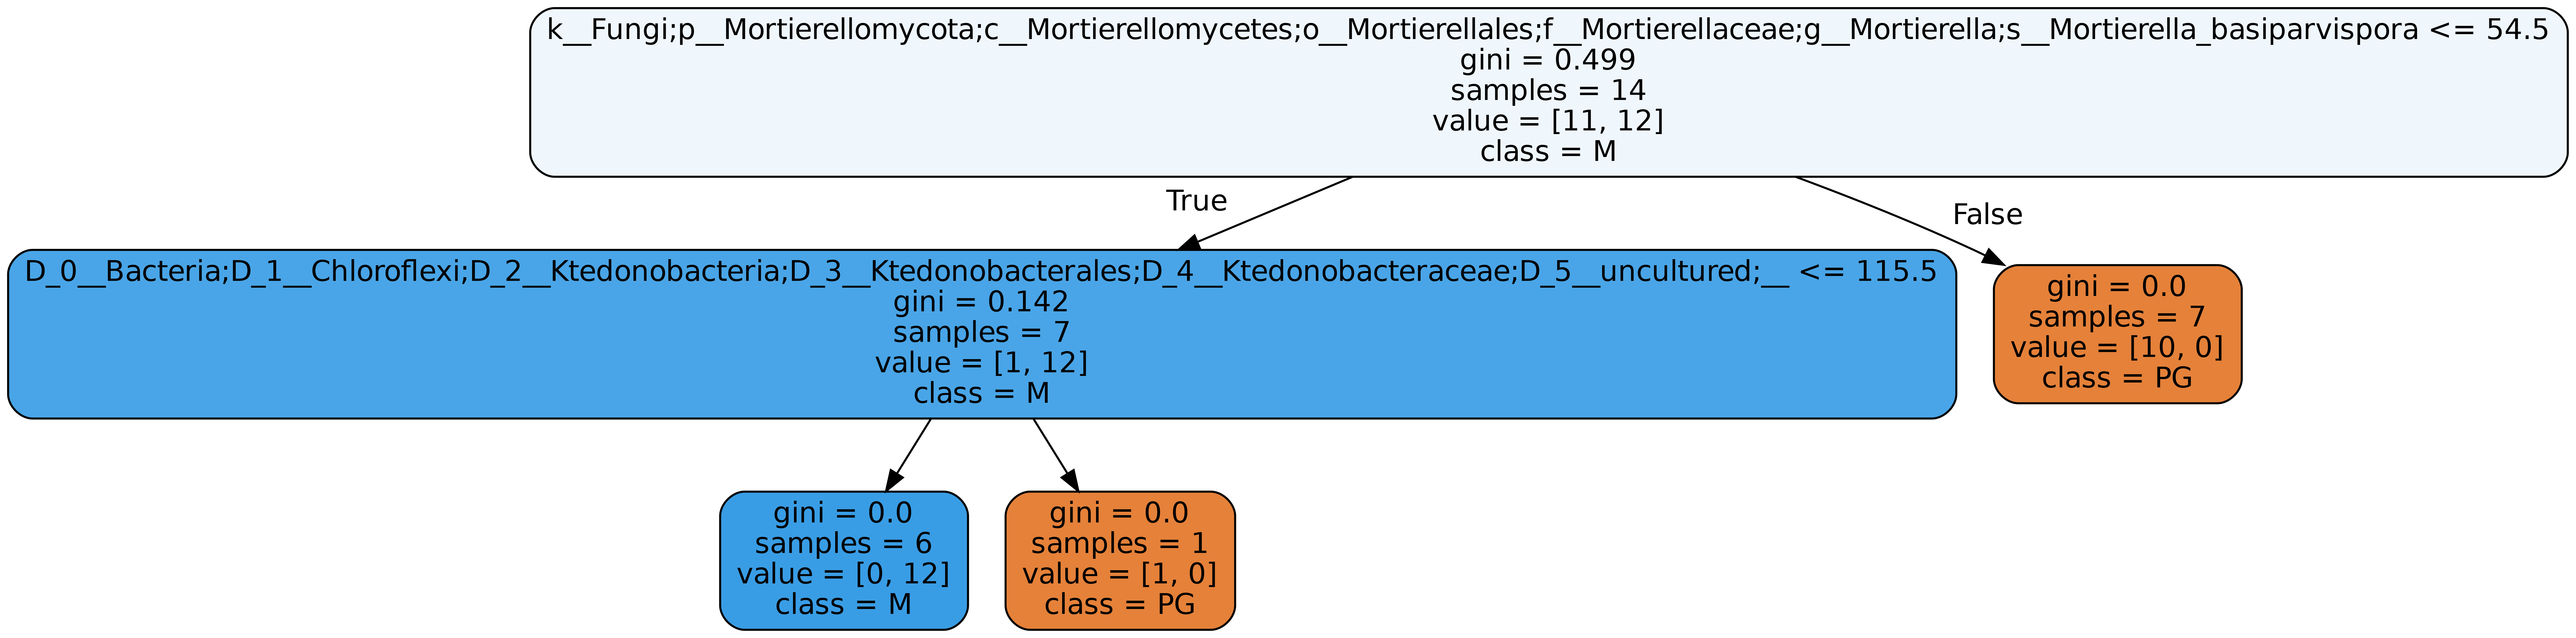

In [23]:
estimator = clf.estimators_[9]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = list(anova_df.head(n = 500)['Columns']),
                class_names = Y_train,
                rounded = True, proportion = False, 
                filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [24]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = map_df[map_df.index.isin(rf_df.index)][predicted_category].values
# Remove the labels from the features
# axis 1 refers to the columns
features= rf_df[anova_df.head(n = 500)['Columns'].values]
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: k__Fungi;p__Mortierellomycota;c__Mortierellomycetes;o__Mortierellales;f__Mortierellaceae;g__Mortierella;s__Mortierella_basiparvispora Importance: 0.06
Variable: D_0__Bacteria;D_1__Actinobacteria;D_2__Thermoleophilia;D_3__Solirubrobacterales;D_4__67-14;__;__ Importance: 0.05
Variable: D_0__Bacteria;D_1__Chloroflexi;D_2__Ktedonobacteria;D_3__Ktedonobacterales;D_4__Ktedonobacteraceae;D_5__HSB OF53-F07;D_6__uncultured Chloroflexi bacterium Importance: 0.03
Variable: D_0__Bacteria;D_1__Actinobacteria;D_2__Acidimicrobiia;D_3__IMCC26256;D_4__uncultured Ferrimicrobium sp.;D_5__;D_6__ Importance: 0.02
Variable: D_0__Bacteria;D_1__Chloroflexi;D_2__Ktedonobacteria;D_3__Ktedonobacterales;D_4__Ktedonobacteraceae;D_5__JG30a-KF-32;__ Importance: 0.02
Variable: D_0__Bacteria;D_1__Chloroflexi;D_2__AD3;D_3__uncultured Thermoflavimicrobium sp.;D_4__;D_5__;D_6__ Importance: 0.02
Variable: D_0__Bacteria;D_1__Chloroflexi;D_2__AD3;D_3__uncultured bacterium;D_4__;D_5__;D_6__ Importance: 0.02
Variabl

In [25]:
feature_importances_asav_count = pd.merge(pd.DataFrame(feature_importances).set_index(0), pd.DataFrame(rf_df.sum(axis = 0)), left_index=True, right_index=True)
if predicted_category == 'Landform':
    feature_importances_asav_count.to_csv('landform_feature_importances.csv')
elif predicted_category == 'Depth_PG_M':
    feature_importances_asav_count.to_csv('depth_landform_feature_importances.csv')

                                                Columns  Statistic   P_value  \
1574  k__Fungi;p__Mortierellomycota;c__Mortierellomy...   7.054364  0.012378   

        PG_mean  PG_lower   PG_upper    M_mean    M_lower     M_upper  
1574  13.705882  2.080797  25.330968  281.4375  60.095763  502.779237  


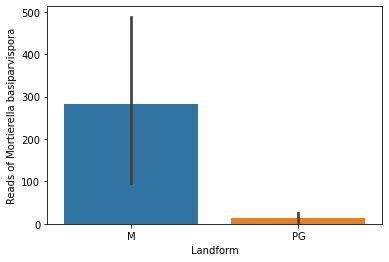

In [26]:
asv = 'k__Fungi;p__Mortierellomycota;c__Mortierellomycetes;o__Mortierellales;f__Mortierellaceae;g__Mortierella;s__Mortierella_basiparvispora'
asv_df = pd.merge(rf_df[asv], map_df[predicted_category], left_index = True, right_index = True)
print(anova_df.loc[anova_df['Columns'] == asv])
sns.barplot(x = predicted_category, y = asv, data = asv_df)
plt.ylabel('Reads of Mortierella basiparvispora')
plt.savefig('../Figures/M_basiparispora.jpg')